In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

df = pd.read_csv("online_retail.csv")

In [3]:
df.head(2)
df.tail(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [6]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [7]:
df.isnull().mean() * 100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

<Axes: >

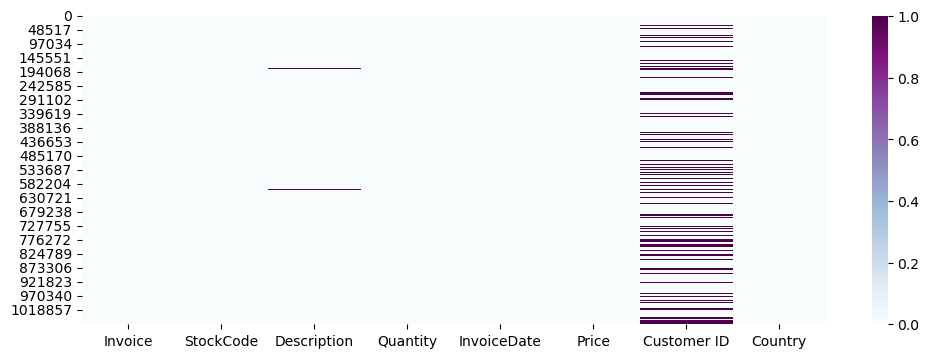

In [8]:
plt.figure(figsize=(12, 4))
sns.heatmap(data=df.isnull(), cmap="BuPu")

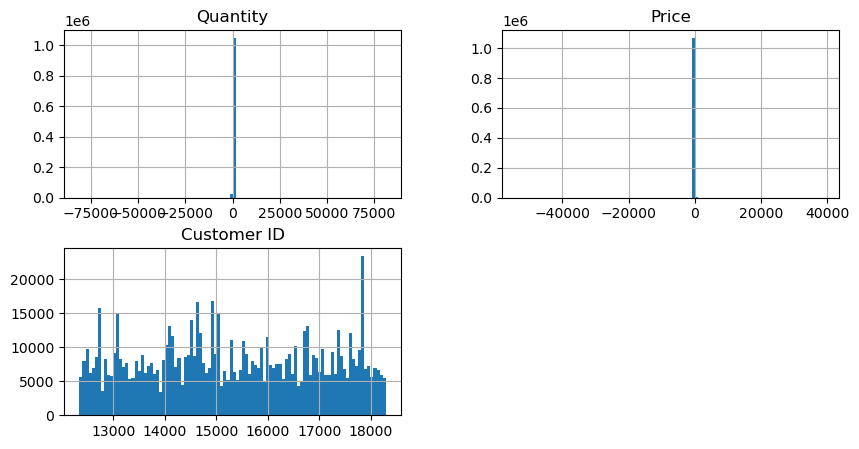

In [9]:
df.hist(figsize=(10, 5), bins=100);
#1에 가까운 부분에 값이 쏠려 있다
#Quantity, UnitPrice 에 이상치가 있다 -> 범위가 넓게 잡혀있음

In [10]:
df["TotalPrice"] = df["Quantity"]*df["Price"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [11]:
df.loc[df["Customer ID"].isnull(), "Country"].value_counts()

Country
United Kingdom          240029
EIRE                      1671
Hong Kong                  364
Unspecified                232
France                     128
Switzerland                125
Portugal                   116
United Arab Emirates       114
Bahrain                     67
Israel                      47
RSA                         46
Bermuda                     34
Sweden                      19
Lebanon                     13
Nigeria                      2
Name: count, dtype: int64

In [12]:
df.loc[df["Customer ID"].notnull(), "Country"].value_counts()

Country
United Kingdom          741301
Germany                  17624
EIRE                     16195
France                   14202
Netherlands               5140
Spain                     3811
Belgium                   3123
Switzerland               3064
Portugal                  2504
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1345
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Greece                     663
Japan                      582
USA                        535
Poland                     535
Unspecified                524
United Arab Emirates       386
Singapore                  346
Israel                     324
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        123
Brazil                      94


In [13]:
df.groupby("Country")["TotalPrice"].agg(['mean', 'sum']).nlargest(10, 'sum').style.format("{:,.0f}")

,mean,sum
Country,,
United Kingdom,17,"16,382,584"
EIRE,34,"615,520"
Netherlands,107,"548,525"
Germany,24,"417,989"
France,23,"328,192"
Australia,87,"167,129"
Switzerland,31,"99,729"
Spain,24,"91,859"
Sweden,64,"87,809"


In [14]:
stock_sale = df.groupby(['StockCode']).agg({
    "Invoice": "count",
    "Quantity": "sum", 
    "TotalPrice": "sum", 
}).nlargest(10, "Invoice")

stock_sale


,Invoice,Quantity,TotalPrice
StockCode,,,
85123A,5829,96066,253720.02
22423,4424,25764,327813.65
85099B,4216,95739,181278.51
21212,3318,95450,52447.54
20725,3259,40011,70909.10
84879,2960,80705,131413.85
47566,2768,27291,147948.50
21232,2747,38033,49655.25
22197,2549,79363,80300.07


In [15]:
stock_desc = df.loc[df['StockCode'].isin(stock_sale.index),
				["StockCode", "Description"]].drop_duplicates(
                "StockCode", keep='first').set_index("StockCode")
stock_desc

,Description
StockCode,
21232,STRAWBERRY CERAMIC TRINKET BOX
84879,ASSORTED COLOUR BIRD ORNAMENT
85123A,WHITE HANGING HEART T-LIGHT HOLDER
85099B,JUMBO BAG RED WHITE SPOTTY
20725,LUNCH BAG RED SPOTTY
21212,PACK OF 72 RETRO SPOT CAKE CASES
22197,"POPCORN HOLDER , SMALL"
47566,PARTY BUNTING
22383,LUNCHBAG SUKI DESIGN


In [16]:
stock_sale['Desc'] = stock_desc
stock_sale

,Invoice,Quantity,TotalPrice,Desc
StockCode,,,,
85123A,5829,96066,253720.02,WHITE HANGING HEART T-LIGHT HOLDER
22423,4424,25764,327813.65,REGENCY CAKESTAND 3 TIER
85099B,4216,95739,181278.51,JUMBO BAG RED WHITE SPOTTY
21212,3318,95450,52447.54,PACK OF 72 RETRO SPOT CAKE CASES
20725,3259,40011,70909.10,LUNCH BAG RED SPOTTY
84879,2960,80705,131413.85,ASSORTED COLOUR BIRD ORNAMENT
47566,2768,27291,147948.50,PARTY BUNTING
21232,2747,38033,49655.25,STRAWBERRY CERAMIC TRINKET BOX
22197,2549,79363,80300.07,"POPCORN HOLDER , SMALL"


In [17]:
df[df["Quantity"] < 0].head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.9


In [18]:
df["Cancel"] = df["Quantity"] < 0
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Cancel
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,False


In [19]:
df.groupby("Customer ID")["Cancel"].mean()

Customer ID
12346.0    0.291667
12347.0    0.000000
12348.0    0.000000
12349.0    0.027778
12350.0    0.000000
             ...   
18283.0    0.000000
18284.0    0.034483
18285.0    0.000000
18286.0    0.042857
18287.0    0.006410
Name: Cancel, Length: 5942, dtype: float64

In [20]:
df.groupby("Customer ID")["Cancel"].value_counts(normalize=True)

Customer ID  Cancel
12346.0      False     0.708333
             True      0.291667
12347.0      False     1.000000
12348.0      False     1.000000
12349.0      False     0.972222
                         ...   
18285.0      False     1.000000
18286.0      False     0.957143
             True      0.042857
18287.0      False     0.993590
             True      0.006410
Name: proportion, Length: 8453, dtype: float64

In [21]:
df.groupby("Customer ID")["Cancel"].value_counts().unstack().nlargest(10, False)

Cancel,False,True
Customer ID,,
17841.0,12890.0,207.0
14911.0,11247.0,366.0
12748.0,7230.0,77.0
14606.0,6566.0,143.0
14096.0,5111.0,17.0
15311.0,4434.0,283.0
14156.0,4048.0,82.0
14646.0,3854.0,36.0
13089.0,3363.0,75.0


In [22]:
cancel_stock = df.groupby(['StockCode']).agg({"Invoice":"count",
											"Cancel": "mean"})
cancel_stock.nlargest(10, "Invoice")

,Invoice,Cancel
StockCode,,
85123A,5829,0.023503
22423,4424,0.081148
85099B,4216,0.020636
21212,3318,0.008439
20725,3259,0.024547
84879,2960,0.007095
47566,2768,0.009032
21232,2747,0.069166
22197,2549,0.037662


In [23]:
cancel_country = df.groupby("Country").agg({"Invoice": "count",
											"Cancel": "mean"})
cancel_country.nlargest(20, "Cancel")

,Invoice,Cancel
Country,,
USA,535,0.235514
Czech Republic,30,0.166667
Japan,582,0.166667
Korea,63,0.158730
Saudi Arabia,10,0.100000
United Arab Emirates,500,0.066000
Nigeria,32,0.062500
Channel Islands,1664,0.057091
Malta,299,0.056856


In [24]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceDay"] = df["InvoiceDate"].dt.day
df["InvoiceDow"] = df["InvoiceDate"].dt.dayofweek
df.head(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,False,2009,12,1,1


In [25]:
df['InvoiceYM'] = df['InvoiceDate'].astype(str).str[:7]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,False,2009,12,1,1,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False,2009,12,1,1,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False,2009,12,1,1,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,False,2009,12,1,1,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,False,2009,12,1,1,2009-12


In [26]:
df["InvoiceTime"] = df["InvoiceDate"].dt.time
df["InvoiceHour"] = df["InvoiceDate"].dt.hour
df.head(1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceTime,InvoiceHour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,False,2009,12,1,1,2009-12,07:45:00,7


<Axes: xlabel='InvoiceYear', ylabel='count'>

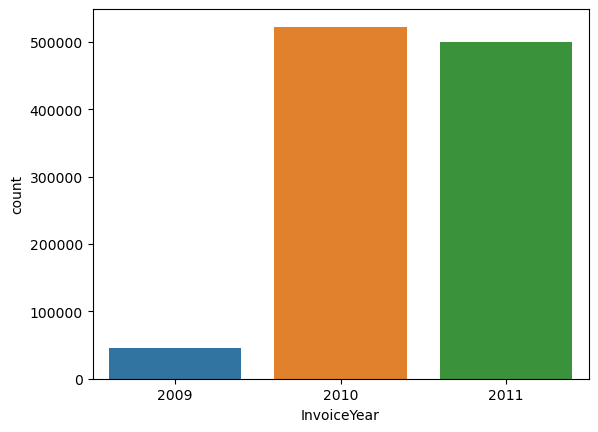

In [27]:
sns.countplot(data=df, x='InvoiceYear')

<Axes: xlabel='InvoiceMonth', ylabel='count'>

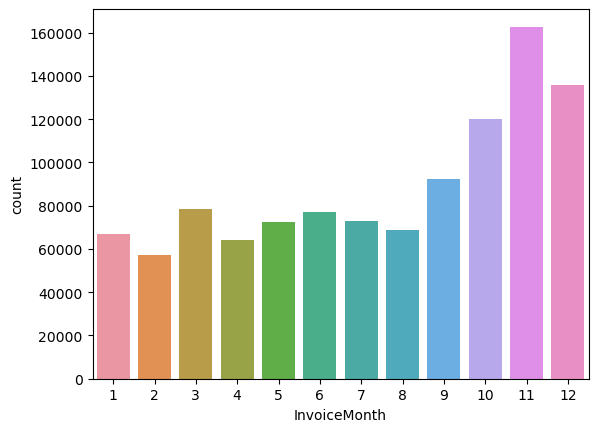

In [28]:
sns.countplot(data=df, x='InvoiceMonth')

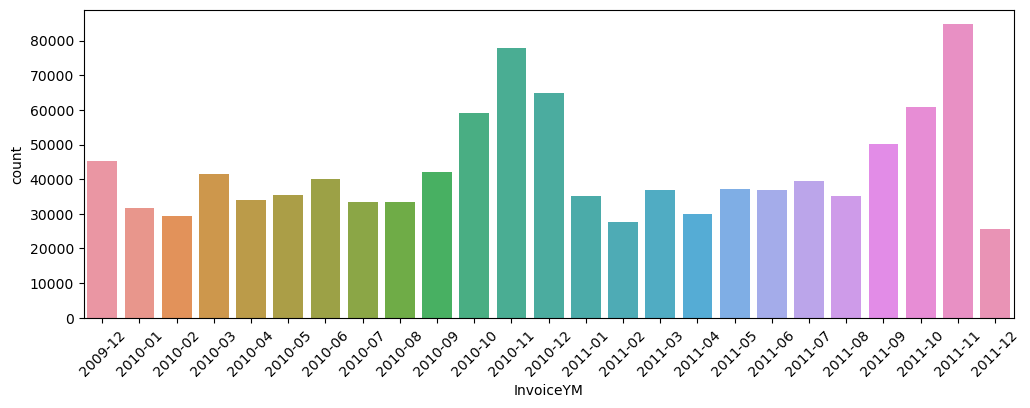

In [83]:
plt.figure(figsize=(12, 4))

ax = sns.countplot(data=df, x='InvoiceYM')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

<Axes: xlabel='InvoiceDow', ylabel='count'>

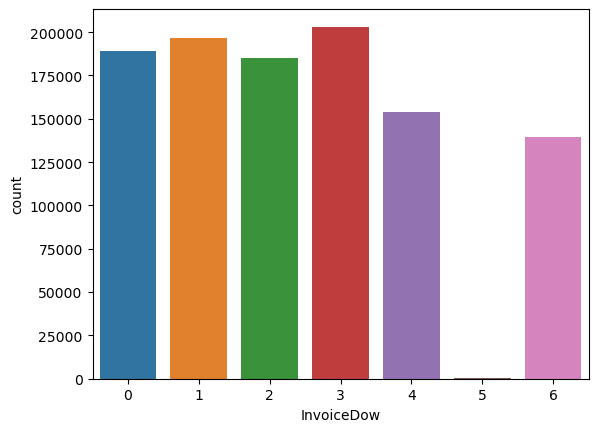

In [30]:
sns.countplot(data=df, x='InvoiceDow')

<Axes: xlabel='InvoiceDow', ylabel='count'>

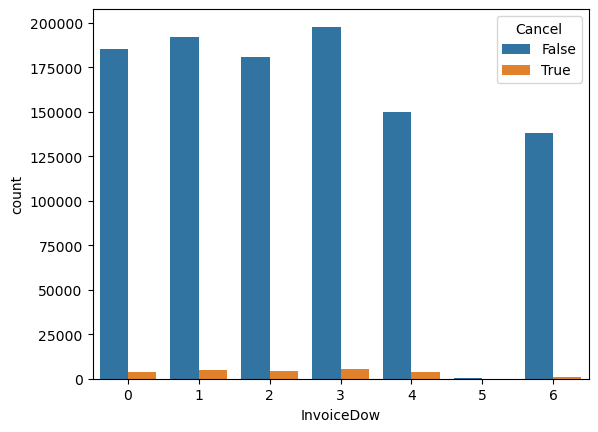

In [31]:
df['Cancel'] = df['Cancel'].astype(str)

sns.countplot(data=df, x='InvoiceDow', hue='Cancel')

<Axes: title={'center': 'Cancellation of purchase by day of the week'}, xlabel='InvoiceDow', ylabel='count'>

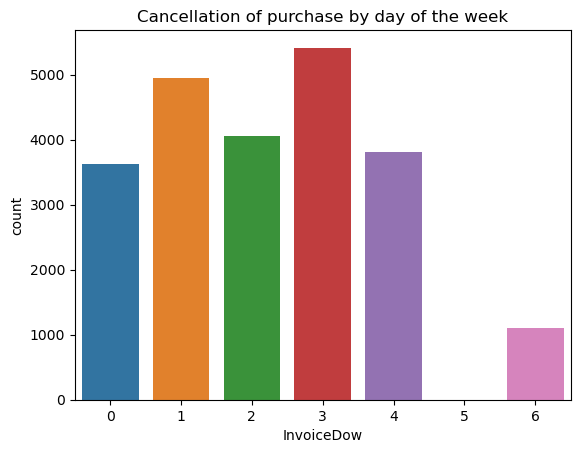

In [32]:
plt.title("Cancellation of purchase by day of the week")
sns.countplot(data=df[df["Cancel"] == "True"], x='InvoiceDow')

In [65]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

dow_count = df['DayOfWeek'].value_counts().sort_index()

<Axes: >

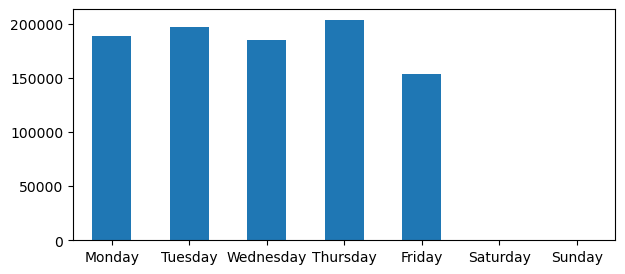

In [64]:
#토요일이 없음;
dow_count.loc[6] = 0

day_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dow_count = dow_count.sort_index()  # 인덱스 정렬
dow_count.index = day_name

dow_count.plot.bar(rot=0, figsize=(7, 3))


<Axes: xlabel='InvoiceHour', ylabel='count'>

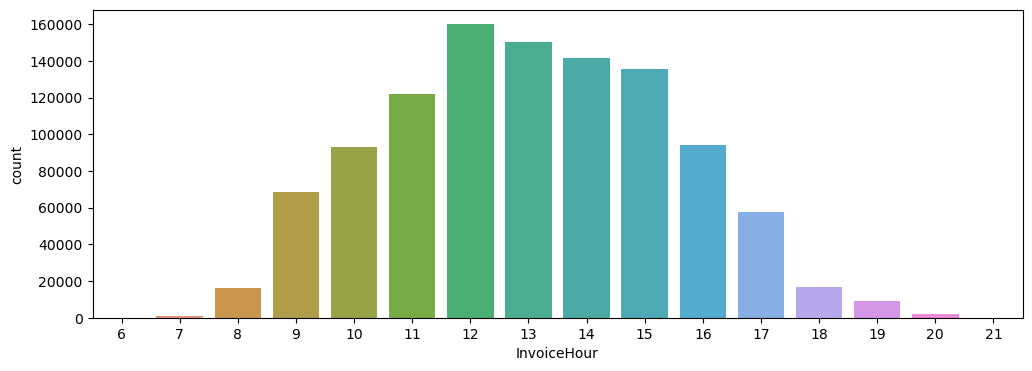

In [68]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='InvoiceHour')


<Axes: xlabel='InvoiceHour', ylabel='TotalPrice'>

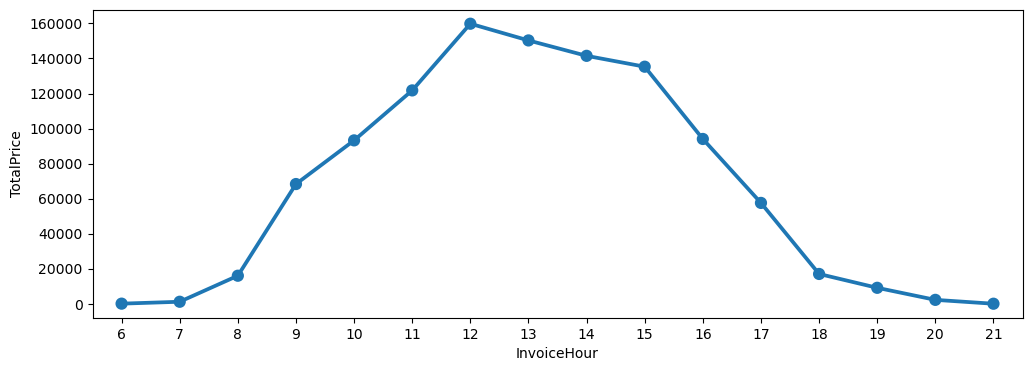

In [69]:
plt.figure(figsize=(12, 4))
sns.pointplot(data=df, x="InvoiceHour", y='TotalPrice',
				estimator='count', errorbar=None)

In [73]:
df['Hour'] = df['InvoiceDate'].dt.hour

df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

hour_dow = df.pivot_table(index='Hour', columns='DayOfWeek', aggfunc='size', fill_value=0)

In [74]:
hour_dow.style.background_gradient(cmap='PuBuGn_r').format("{:,}")

DayOfWeek,0,1,2,3,4,5,6
Hour,,,,,,,
6,0,0,0,41,0,0,0
7,163,254,181,290,239,0,0
8,"3,003","2,976","3,517","3,108","3,381",0,0
9,"15,570","13,627","11,978","13,818","13,242",0,89
10,"17,886","16,100","15,420","17,675","17,016",30,"9,121"
11,"19,562","19,608","20,144","18,926","20,336",4,"23,200"
12,"26,151","28,628","28,791","25,802","21,369",102,"29,003"
13,"27,240","27,248","25,007","25,607","19,116",102,"25,988"
14,"23,066","24,384","25,339","26,030","21,853",57,"20,784"


<Axes: xlabel='DayOfWeek', ylabel='Hour'>

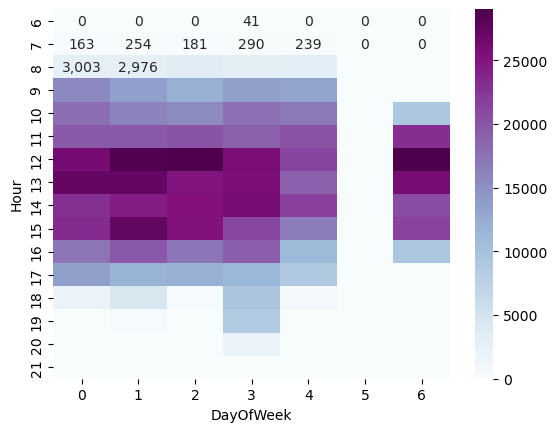

In [75]:
sns.heatmap(hour_dow, cmap='BuPu', annot=True, fmt=',.0f')

<Axes: xlabel='Hour'>

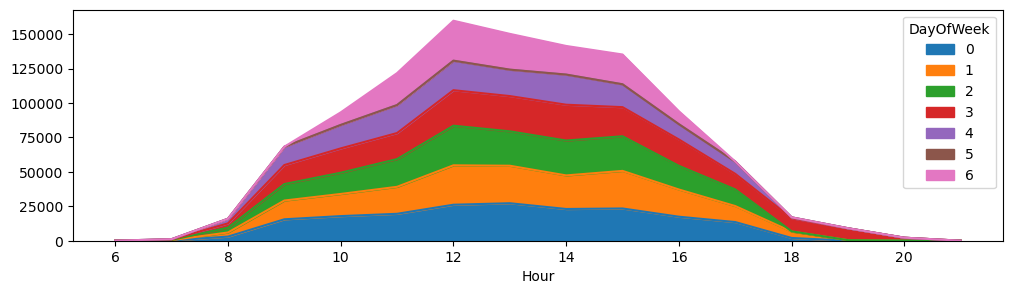

In [76]:
hour_dow.plot.area(figsize=(12, 3))

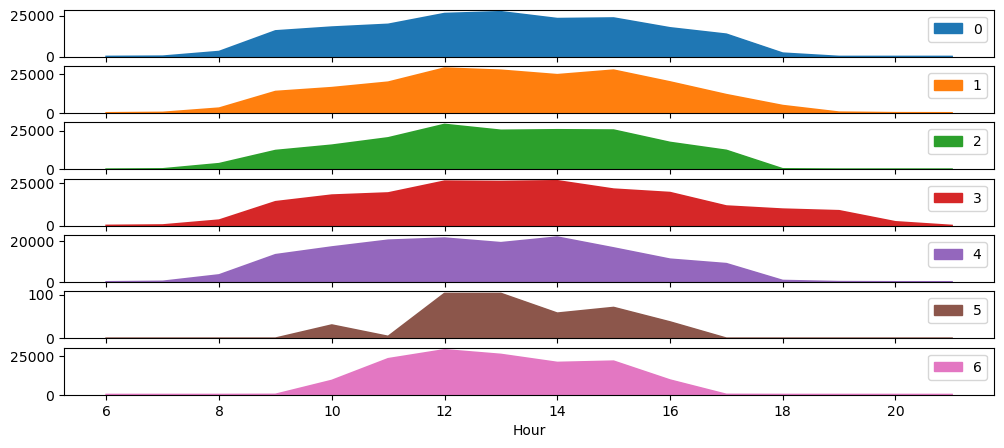

In [77]:
hour_dow.plot.area(figsize=(12, 5), subplots=True);

In [78]:
df_valid = df[df['Customer ID'].notnull() & (df["Quantity"] > 0) & (df["Price"] > 0)].copy()

df.shape, df_valid.shape

((1067371, 19), (805549, 19))

In [79]:
df_valid = df_valid.drop_duplicates()
df_valid.shape

(779425, 19)

In [44]:
arppu = df_valid.groupby("InvoiceYM").agg({"TotalPrice":"sum", "Customer ID":"nunique"})
arppu.columns = ['sale_sum', 'customer_count']
arppu["ARPPU"] = arppu['sale_sum'] / arppu['customer_count']
arppu.style.format("{:,.0f}")

,sale_sum,customer_count,ARPPU
InvoiceYM,,,
2009-12,"683,504",955,716
2010-01,"555,803",720,772
2010-02,"504,559",772,654
2010-03,"696,978","1,057",659
2010-04,"591,982",942,628
2010-05,"597,833",966,619
2010-06,"636,371","1,041",611
2010-07,"589,736",928,635
2010-08,"602,225",911,661


<Axes: title={'center': 'Monthly ARPPU'}, xlabel='InvoiceYM'>

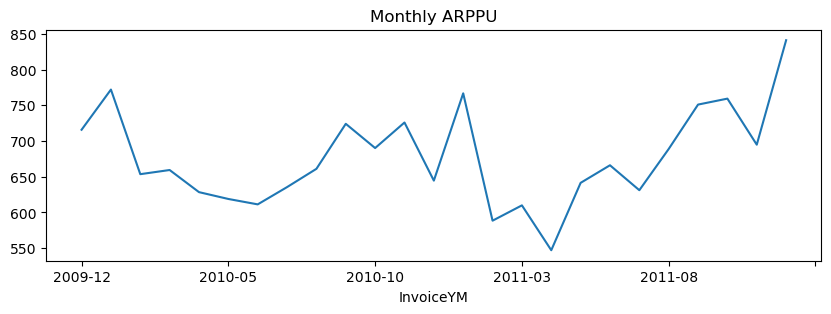

In [45]:
arppu['ARPPU'].plot(figsize=(10, 3), title="Monthly ARPPU")

In [46]:
cust_agg = df_valid.groupby(['Customer ID']).agg({"Invoice":['nunique', 'count'],
											'TotalPrice':['mean', 'sum']})
                                            
cust_agg.columns = ['nunique', 'count', 'mean', 'sum']
cust_agg

,nunique,count,mean,sum
Customer ID,,,,
12346.0,12,34,2281.072353,77556.46
12347.0,8,222,22.169054,4921.53
12348.0,5,51,39.596078,2019.40
12349.0,4,175,25.306800,4428.69
12350.0,1,17,19.670588,334.40
...,...,...,...,...
18283.0,22,938,2.841045,2664.90
18284.0,1,28,16.488571,461.68
18285.0,1,12,35.583333,427.00


<Axes: title={'center': 'MAU(Monthly Active User)'}, xlabel='InvoiceYM'>

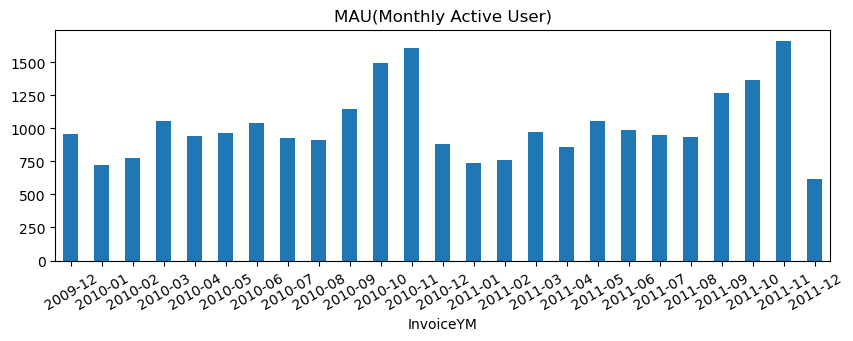

In [47]:
mau = df_valid.groupby('InvoiceYM')['Customer ID'].agg('nunique')
mau.plot.bar(figsize=(10, 3), rot=30, title="MAU(Monthly Active User)")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 17 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Invoice       1067371 non-null  object        
 1   StockCode     1067371 non-null  object        
 2   Description   1062989 non-null  object        
 3   Quantity      1067371 non-null  int64         
 4   InvoiceDate   1067371 non-null  datetime64[ns]
 5   Price         1067371 non-null  float64       
 6   Customer ID   824364 non-null   float64       
 7   Country       1067371 non-null  object        
 8   TotalPrice    1067371 non-null  float64       
 9   Cancel        1067371 non-null  object        
 10  InvoiceYear   1067371 non-null  int32         
 11  InvoiceMonth  1067371 non-null  int32         
 12  InvoiceDay    1067371 non-null  int32         
 13  InvoiceDow    1067371 non-null  int32         
 14  InvoiceYM     1067371 non-null  object        
 15

In [49]:
df_valid.groupby("InvoiceYM").agg({"Invoice" : "count", 
                             "StockCode": "nunique",
                             "Customer ID": "nunique",
                             "Price" : "sum",
                             "Quantity" : "sum",
                             "TotalPrice" : "sum"}) 

,Invoice,StockCode,Customer ID,Price,Quantity,TotalPrice
InvoiceYM,,,,,,
2009-12,30272,2725,955,97105.770,398660,683504.010
2010-01,21458,2368,720,84109.462,370082,555802.672
2010-02,23040,2374,772,73828.886,371861,504558.956
2010-03,31782,2668,1057,124028.171,502100,696978.471
2010-04,26831,2340,942,86746.972,350587,591982.002
2010-05,28233,2377,966,90649.160,384960,597833.380
2010-06,30688,2494,1041,99746.840,389872,636371.130
2010-07,26643,2391,928,89262.370,324632,589736.170
2010-08,26029,2474,911,81616.560,452542,602224.600


In [50]:
df_valid['InvoiceDate1'] = pd.to_datetime(df_valid["InvoiceYM"])
df_valid['InvoiceDate1'].head()

0   2009-12-01
1   2009-12-01
2   2009-12-01
3   2009-12-01
4   2009-12-01
Name: InvoiceDate1, dtype: datetime64[ns]

In [51]:
df_valid[["InvoiceDate", "InvoiceDate1"]].sample(5)

,InvoiceDate,InvoiceDate1
852338,2011-09-05 14:56:00,2011-09-01
837458,2011-08-24 14:23:00,2011-08-01
735167,2011-06-01 15:47:00,2011-06-01
285142,2010-07-26 14:43:00,2010-07-01
644755,2011-03-14 14:51:00,2011-03-01


In [52]:
df_valid["InvoiceDateMin"] = df_valid.groupby('Customer ID')['InvoiceDate1'].transform('min')
df_valid["InvoiceDateMin"]

0         2009-12-01
1         2009-12-01
2         2009-12-01
3         2009-12-01
4         2009-12-01
             ...    
1067366   2011-08-01
1067367   2011-08-01
1067368   2011-08-01
1067369   2011-08-01
1067370   2011-08-01
Name: InvoiceDateMin, Length: 779425, dtype: datetime64[ns]

In [53]:
df_valid[["Customer ID", "InvoiceDate", "InvoiceDateMin", "InvoiceDate1"]].sample(5)

,Customer ID,InvoiceDate,InvoiceDateMin,InvoiceDate1
436806,12749.0,2010-11-05 13:55:00,2010-07-01,2010-11-01
831587,16743.0,2011-08-18 18:15:00,2010-04-01,2011-08-01
401994,17967.0,2010-10-19 13:19:00,2010-10-01,2010-10-01
76328,15338.0,2010-01-31 14:25:00,2010-01-01,2010-01-01
117167,14562.0,2010-03-08 13:48:00,2010-02-01,2010-03-01


In [54]:
year_diff = df_valid['InvoiceDate1'].dt.year - df_valid['InvoiceDateMin'].dt.year
year_diff
month_diff = df_valid['InvoiceDate1'].dt.month - df_valid['InvoiceDateMin'].dt.month
month_diff

0          0
1          0
2          0
3          0
4          0
          ..
1067366    4
1067367    4
1067368    4
1067369    4
1067370    4
Length: 779425, dtype: int32

In [55]:
df_valid["CohortIndex"] = (year_diff * 12) + month_diff + 1
df_valid[['Customer ID', 'InvoiceDate1', 'InvoiceDateMin', 'CohortIndex']].sample(5)

,Customer ID,InvoiceDate1,InvoiceDateMin,CohortIndex
758826,16713.0,2011-06-01,2009-12-01,19
401541,17365.0,2010-10-01,2010-02-01,9
203311,15581.0,2010-05-01,2009-12-01,6
512727,12763.0,2010-12-01,2010-12-01,1
75387,13259.0,2010-01-01,2010-01-01,1


In [56]:
df_valid['CohortIndex'].value_counts().sort_index()

CohortIndex
1     165508
2      39284
3      39499
4      40175
5      35624
6      33740
7      32316
8      30721
9      27910
10     28199
11     28474
12     34315
13     29923
14     22626
15     19034
16     19732
17     18430
18     19736
19     18204
20     18923
21     17505
22     18093
23     16120
24     19164
25      6170
Name: count, dtype: int64

<Axes: xlabel='CohortIndex', ylabel='count'>

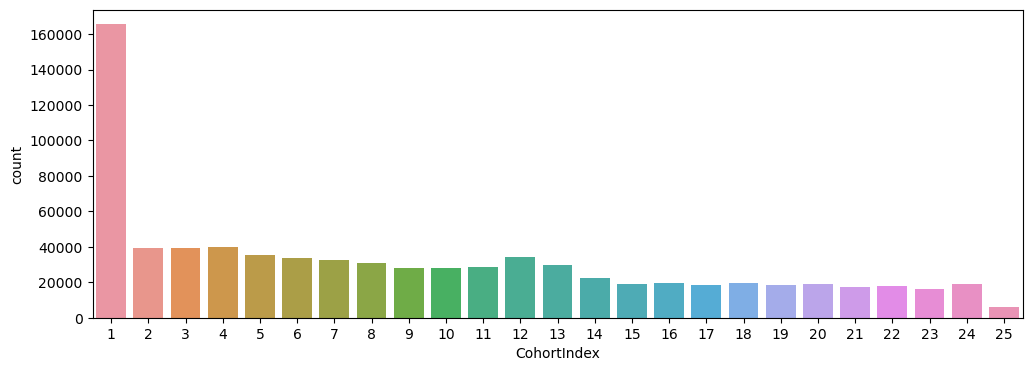

In [57]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df_valid, x='CohortIndex')

In [58]:
cohort_count = df_valid.groupby(['InvoiceDateMin', 'CohortIndex'])['Customer ID'].nunique().unstack()
cohort_count.index = cohort_count.index.astype(str)
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
InvoiceDateMin,,,,,,,,,,,,,,,,,,,,,
2009-12-01,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,...,289.0,251.0,289.0,270.0,248.0,244.0,301.0,291.0,389.0,188.0
2010-01-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,...,58.0,90.0,76.0,71.0,75.0,93.0,74.0,94.0,22.0,NaN
2010-02-01,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,...,75.0,60.0,61.0,54.0,86.0,86.0,61.0,22.0,NaN,NaN
2010-03-01,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,48.0,...,75.0,77.0,69.0,78.0,89.0,94.0,35.0,NaN,NaN,NaN
2010-04-01,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,31.0,32.0,...,46.0,41.0,44.0,53.0,66.0,17.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,40.0,43.0,44.0,45.0,65.0,54.0,32.0,15.0,21.0,...,32.0,35.0,42.0,39.0,12.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,270.0,47.0,51.0,55.0,62.0,77.0,34.0,24.0,22.0,32.0,...,33.0,36.0,55.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,186.0,29.0,34.0,55.0,54.0,26.0,21.0,27.0,27.0,21.0,...,32.0,44.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,162.0,33.0,48.0,52.0,28.0,19.0,16.0,20.0,22.0,21.0,...,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='InvoiceDateMin'>

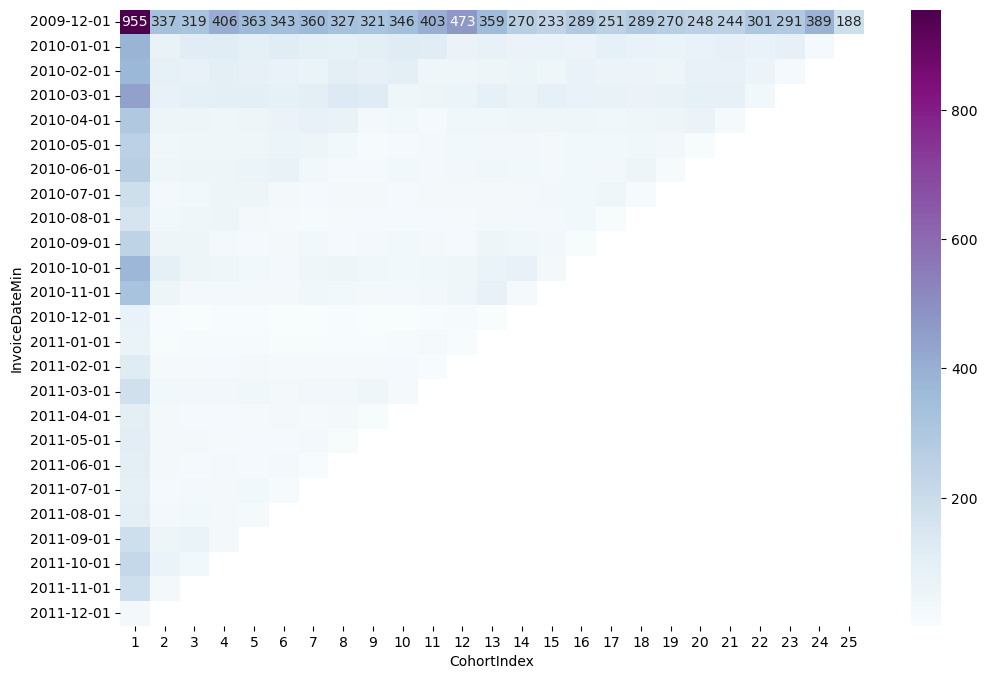

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_count, annot=True, fmt=".0f", cmap="BuPu")

<Axes: title={'center': 'Monthly new inflows'}, xlabel='InvoiceDateMin'>

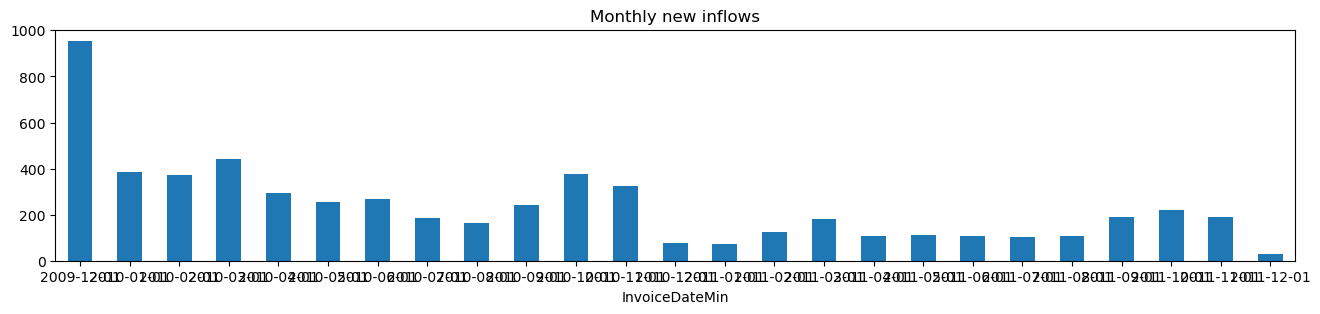

In [60]:
cohort_count[1].plot.bar(figsize=(16, 3), title="Monthly new inflows", rot=0)

In [61]:
cohort_norm = cohort_count.div(cohort_count[1], axis=0)
cohort_norm

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
InvoiceDateMin,,,,,,,,,,,,,,,,,,,,,
2009-12-01,1.0,0.352880,0.334031,0.425131,0.380105,0.359162,0.376963,0.342408,0.336126,0.362304,...,0.302618,0.262827,0.302618,0.282723,0.259686,0.255497,0.315183,0.304712,0.407330,0.196859
2010-01-01,1.0,0.206266,0.310705,0.305483,0.263708,0.300261,0.258486,0.229765,0.279373,0.318538,...,0.151436,0.234987,0.198433,0.185379,0.195822,0.242820,0.193211,0.245431,0.057441,NaN
2010-02-01,1.0,0.237968,0.224599,0.291444,0.245989,0.200535,0.192513,0.286096,0.254011,0.275401,...,0.200535,0.160428,0.163102,0.144385,0.229947,0.229947,0.163102,0.058824,NaN,NaN
2010-03-01,1.0,0.189616,0.230248,0.241535,0.232506,0.203160,0.246050,0.302483,0.275395,0.108352,...,0.169300,0.173815,0.155756,0.176072,0.200903,0.212190,0.079007,NaN,NaN,NaN
2010-04-01,1.0,0.193878,0.193878,0.163265,0.183673,0.224490,0.275510,0.261905,0.105442,0.108844,...,0.156463,0.139456,0.149660,0.180272,0.224490,0.057823,NaN,NaN,NaN,NaN
2010-05-01,1.0,0.157480,0.169291,0.173228,0.177165,0.255906,0.212598,0.125984,0.059055,0.082677,...,0.125984,0.137795,0.165354,0.153543,0.047244,NaN,NaN,NaN,NaN,NaN
2010-06-01,1.0,0.174074,0.188889,0.203704,0.229630,0.285185,0.125926,0.088889,0.081481,0.118519,...,0.122222,0.133333,0.203704,0.051852,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,1.0,0.155914,0.182796,0.295699,0.290323,0.139785,0.112903,0.145161,0.145161,0.112903,...,0.172043,0.236559,0.080645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,1.0,0.203704,0.296296,0.320988,0.172840,0.117284,0.098765,0.123457,0.135802,0.129630,...,0.197531,0.067901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_norm, cmap="BuPu", annot=True, fmt=".2f")

In [ ]:
#https://velog.io/@psy4072/Online-Retail-UCI-Kaggle-EDA

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 19 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Invoice       1067371 non-null  object        
 1   StockCode     1067371 non-null  object        
 2   Description   1062989 non-null  object        
 3   Quantity      1067371 non-null  int64         
 4   InvoiceDate   1067371 non-null  datetime64[ns]
 5   Price         1067371 non-null  float64       
 6   Customer ID   824364 non-null   float64       
 7   Country       1067371 non-null  object        
 8   TotalPrice    1067371 non-null  float64       
 9   Cancel        1067371 non-null  object        
 10  InvoiceYear   1067371 non-null  int32         
 11  InvoiceMonth  1067371 non-null  int32         
 12  InvoiceDay    1067371 non-null  int32         
 13  InvoiceDow    1067371 non-null  int32         
 14  InvoiceYM     1067371 non-null  object        
 15

In [87]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceHour,DayOfWeek,Hour
count,1.067371e+06,1067371,1.067371e+06,824364.000000,1.067371e+06,1.067371e+06,1.067371e+06,1.067371e+06,1.067371e+06,1.067371e+06,1.067371e+06,1.067371e+06
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504,1.806987e+01,2.010426e+03,7.496765e+00,1.513460e+01,2.462998e+00,1.303373e+01,2.462998e+00,1.303373e+01
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000,-1.684696e+05,2.009000e+03,1.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000,3.750000e+00,2.010000e+03,5.000000e+00,8.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,1.100000e+01
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000,9.900000e+00,2.010000e+03,8.000000e+00,1.500000e+01,2.000000e+00,1.300000e+01,2.000000e+00,1.300000e+01
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000,1.770000e+01,2.011000e+03,1.100000e+01,2.200000e+01,4.000000e+00,1.500000e+01,4.000000e+00,1.500000e+01
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000,1.684696e+05,2.011000e+03,1.200000e+01,3.100000e+01,6.000000e+00,2.100000e+01,6.000000e+00,2.100000e+01
std,1.727058e+02,NaN,1.235531e+02,1697.464450,2.924202e+02,5.737608e-01,3.526416e+00,8.680516e+00,1.880427e+00,2.435349e+00,1.880427e+00,2.435349e+00


In [89]:
total_users = len(df['Customer ID'].unique())  

churned_users = df[df['InvoiceDate'] < '2011-12-09']['Customer ID'].nunique()  

churn_rate = churned_users / total_users


In [99]:
ltv = arppu / churn_rate
print(f"LTV: {ltv}")

LTV:                sale_sum  customer_count       ARPPU
InvoiceYM                                          
2009-12    6.837341e+05      955.321495  715.951945
2010-01    5.559898e+05      720.242383  772.208027
2010-02    5.047288e+05      772.259889  653.793799
2010-03    6.972131e+05     1057.355832  659.615047
2010-04    5.921813e+05      942.317118  628.642557
2010-05    5.980346e+05      966.325198  619.083475
2010-06    6.365854e+05     1041.350446  611.513314
2010-07    5.899347e+05      928.312405  635.705497
2010-08    6.024273e+05      911.306682  661.281378
2010-09    8.292930e+05     1145.385457  724.273392
2010-10    1.033460e+06     1497.503956  690.353908
2010-11    1.166853e+06     1607.540986  726.106225
2010-12    5.706148e+05      885.297930  644.762440
2011-01    5.682926e+05      741.249453  766.926529
2011-02    4.462351e+05      758.255176  588.700649
2011-03    5.942818e+05      974.327891  610.145538
2011-04    4.685320e+05      856.288167  547.350475
2011-05

<Axes: title={'center': 'Monthly ARPPU'}, xlabel='InvoiceYM'>

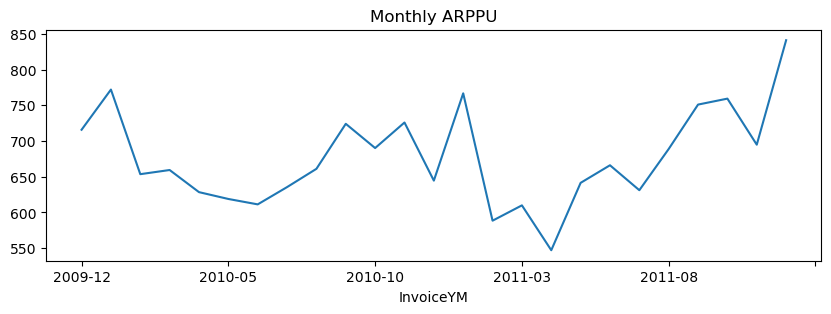

In [104]:
arppu['ARPPU'].plot(figsize=(10, 3), title="Monthly ARPPU")